# 데이터 가져오기 및 확인

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

org_datas = load_diabetes(as_frame=True)


In [2]:
df_X = pd.DataFrame(org_datas.data)
df_y = pd.DataFrame(org_datas.target)

In [3]:
# pandas dataframe 으로 변경한 diabetes data shape 확인
df_X.shape

(442, 10)

In [4]:
# pandas dataframe 으로 변경한 diabetes data 확인
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
# pandas dataframe 으로 변경한 diabetes target shape 확인
df_y.shape

(442, 1)

In [6]:
# pandas dataframe 으로 변경한 diabetes target 확인
df_y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


# 모델에 입력할 데이터 준비하기

In [7]:
# pandas dataframe 으로 변경한 diabetes data를 numpy로
print(f'변환 전 {type(df_X)}')
np_X = df_X.values
print(f'변환 후 {type(np_X)}')
np_X

변환 전 <class 'pandas.core.frame.DataFrame'>
변환 후 <class 'numpy.ndarray'>


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

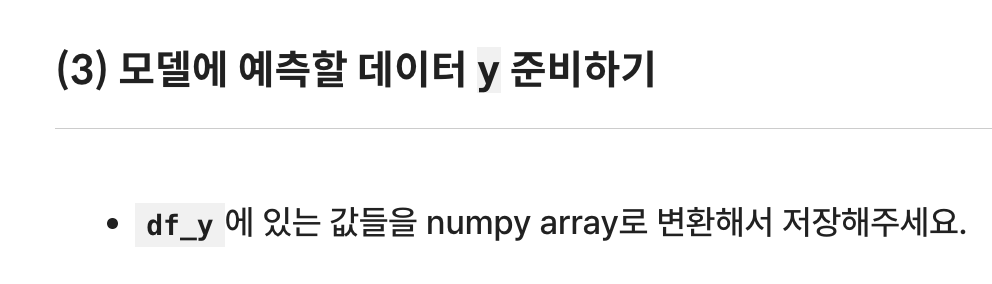

In [8]:
# pandas dataframe 으로 변경한 diabetes data를 numpy로
print(f'변환 전 {type(df_y)}')
np_y = df_y.values
print(f'변환 후 {type(np_y)}')
np_y

변환 전 <class 'pandas.core.frame.DataFrame'>
변환 후 <class 'numpy.ndarray'>


array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.],
       [138.],
       [ 63.],
       [110.],
       [310.],
       [101.],
       [ 69.],
       [179.],
       [185.],
       [118.],
       [171.],
       [166.],
       [144.],
       [ 97.],
       [168.],
       [ 68.],
       [ 49.],
       [ 68.],
       [245.],
       [184.],
       [202.],
       [137.],
       [ 85.],
       [131.],
       [283.],
       [129.],
       [ 59.],
       [341.],
       [ 87.],
       [ 65.],
       [102.],
       [265.],
       [276.],
       [252.],
       [ 90.],
       [100.],
       [ 55.],
       [ 61.],
       [ 92.],
       [259.],
       [ 53.],
       [190.],
       [142.],
       [ 75.],
       [142.],
       [155.],
       [225.],
       [ 59.],
       [104.],
       [182.],
       [128.],
       [ 52.],
       [ 37.],
       [170.],
       [170.],
       [ 61.],
       [144.],
       [ 52.],
       [128.],
       [ 71.],
       [163.],
       [15

# 데이터셋 분리

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353, 1)
(89, 10) (89, 1)


# 모델 준비 및 입력데이터 준비

In [18]:
# y=w1x1+w2x2+w3x3+w4x4+w5x5+w6x6+w7x7+w8x8+w9x9+w10x10+b

W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += np_X[:, i] * W[i]
    print(np_X.shape)
    print(W.shape)
    predictions += b
    return predictions

# 손실함수 (MSE)

In [19]:
def mse(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = mse(predictions, y)
    return L

# gradient 함수

In [20]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

# 학습률 설정

In [21]:
LEARNING_RATE = 0.0001

# 모델 학습하기

In [22]:
losses = []

for epoch in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)

    print('a',dW,'b',db)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if epoch % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

(442, 10)
(10,)


ValueError: Unable to coerce to Series, length must be 1: given 442

🔑 **PRT(Peer Review Template)**

- [ ]  **1. 주어진 문제를 해결하는 완성된 코드가 제출되었나요? (완성도)**
    - 문제에서 요구하는 최종 결과물이 첨부되었는지 확인
    - 문제를 해결하는 완성된 코드란 프로젝트 루브릭 3개 중 2개, 
    퀘스트 문제 요구조건 등을 지칭
        - 해당 조건을 만족하는 부분의 코드 및 결과물을 캡쳐하여 사진으로 첨부

- [ ]  **2. 프로젝트에서 핵심적인 부분에 대한 설명이 주석(닥스트링) 및 마크다운 형태로 잘 기록되어있나요? (설명)**
    - [ ]  모델 선정 이유
    - [ ]  Metrics 선정 이유
    - [ ]  Loss 선정 이유

- [ ]  **3. 체크리스트에 해당하는 항목들을 모두 수행하였나요? (문제 해결)**
    - [ ]  데이터를 분할하여 프로젝트를 진행했나요? (train, validation, test 데이터로 구분)
    - [ ]  하이퍼파라미터를 변경해가며 여러 시도를 했나요? (learning rate, dropout rate, unit, batch size, epoch 등)
    - [ ]  각 실험을 시각화하여 비교하였나요?
    - [ ]  모든 실험 결과가 기록되었나요?

- [ ]  **4. 프로젝트에 대한 회고가 상세히 기록 되어 있나요? (회고, 정리)**
    - [ ]  배운 점
    - [ ]  아쉬운 점
    - [ ]  느낀 점
    - [ ]  어려웠던 점